# Analysis about fuel cycle scenarios for HALEU fueled reactors

5 total fuel cycle scenarios are considered for this work:
* Scenario 1: Current US fuel cycle
* Scenario 2: No growth transition to USNC MMR 
* Scenario 3: No growth transition to X-energy Xe-100
* Scenario 4: 1% annual growth transition to USNC MMR
* Scenario 5: 1% annual growth transition to X-energy Xe-100

Results include the number of reactors 
deployed, total energy output, mass of enriched uranium, and the total SWU capacity 
required in each scenario. 

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
import cymetric as cym
from cymetric import timeseries
from cymetric import filters
from cymetric import tools

import transition_metrics as tm

In [3]:
current_outfile = '../outputs/united_states_2020.sqlite'
mmr_nogrowth_outfile = '../outputs/mmr_nogrowth.sqlite'
mmr_1percent_outfile = '../outputs/mmr_1percent.sqlite'
xe_nogrowth_outfile = '../outputs/xe100_nogrowth.sqlite'
xe_1percent_outfile = '../outputs/xe100_1percent.sqlite'

## Reactors Built and Decommissioned

This section plots the number of each reactor type in the simulation as a function of time

In [89]:
current_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill',
                 'Enrichment', 'FuelFab', 'DryStorage', 'United States',
                 'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA']
mmr_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill',
             'Enrichment', 'FuelFab', 'DryStorage', 'United States',
             'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA',
             'MMR_enter','MMR_exit']
xe_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill',
             'Enrichment', 'FuelFab', 'DryStorage', 'United States',
             'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA',
             'Xe-100']

In [90]:
current_reactors = tm.rx_commission_decommission(current_outfile, current_nonlwr)
current_reactors = tm.add_year(current_reactors)

mmr_nogrowth_reactors = tm.rx_commission_decommission(mmr_nogrowth_outfile, mmr_nonlwr)
mmr_nogrowth_reactors = tm.add_year(mmr_nogrowth_reactors)
mmr_nogrowth_reactors['mmr_total'] = (mmr_nogrowth_reactors['MMR_enter'] 
                                      + mmr_nogrowth_reactors['MMR_exit']).cumsum()

mmr_1percent_reactors = tm.rx_commission_decommission(mmr_1percent_outfile, mmr_nonlwr)
mmr_1percent_reactors = tm.add_year(mmr_1percent_reactors)
mmr_1percent_reactors['mmr_total'] = (mmr_1percent_reactors['MMR_enter'] 
                                      + mmr_1percent_reactors['MMR_exit']).cumsum()

xe_nogrowth_reactors = tm.rx_commission_decommission(xe_nogrowth_outfile, xe_nonlwr)
xe_nogrowth_reactors = tm.add_year(xe_nogrowth_reactors)
xe_nogrowth_reactors['xe_total'] = xe_nogrowth_reactors['Xe-100'].cumsum()

xe_1percent_reactors = tm.rx_commission_decommission(xe_1percent_outfile, xe_nonlwr)
xe_1percent_reactors = tm.add_year(xe_1percent_reactors)
xe_1percent_reactors['xe_total'] = xe_1percent_reactors['Xe-100'].cumsum()

/home/amandabachmann/transition-scenarios/input/haleu/analysis/transition_metrics.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][index] = np.round(df['Time'][index] / 12 + 1965, 2)


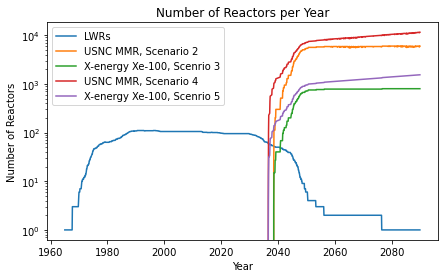

In [92]:
plt.figure(figsize=(7,4))
plt.plot(current_reactors['Year'], current_reactors['lwr_total'], label='LWRs')
plt.plot(mmr_nogrowth_reactors['Year'], mmr_nogrowth_reactors['mmr_total'], label='USNC MMR, Scenario 2')
plt.plot(xe_nogrowth_reactors['Year'], xe_nogrowth_reactors['xe_total'], label='X-energy Xe-100, Scenrio 3')
plt.plot(mmr_1percent_reactors['Year'], mmr_1percent_reactors['mmr_total'], label='USNC MMR, Scenario 4')
plt.plot(xe_1percent_reactors['Year'], xe_1percent_reactors['xe_total'], label='X-energy Xe-100, Scenrio 5')
plt.title('Number of Reactors per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reactors')
plt.yscale('log')
plt.legend()
plt.savefig('figures/rxdeployment_scenarios_all.png')

In [120]:
xe_1percent_reactors['Xe-100'].max()

51.0

## Energy output

In [93]:
current_energy = tm.get_electricity(current_outfile)
mmr_nogrowth_energy = tm.get_electricity(mmr_nogrowth_outfile)
mmr_1percent_energy = tm.get_electricity(mmr_1percent_outfile)
xe_nogrowth_energy = tm.get_electricity(xe_nogrowth_outfile)
xe_1percent_energy = tm.get_electricity(xe_1percent_outfile)

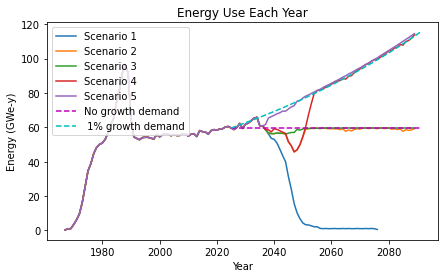

In [98]:
time = np.linspace(2025,2091, 65)

plt.figure(figsize=(7,4))
plt.plot(current_energy['Year'], current_energy['Energy'], label='Scenario 1')
plt.plot(mmr_nogrowth_energy['Year'], mmr_nogrowth_energy['Energy'], label='Scenario 2')
plt.plot(xe_nogrowth_energy['Year'], xe_nogrowth_energy['Energy'], label='Scenario 3')
plt.plot(mmr_1percent_energy['Year'], mmr_1percent_energy['Energy'], label='Scenario 4')
plt.plot(xe_1percent_energy['Year'], xe_1percent_energy['Energy'], label='Scenario 5')
#Demand lines
plt.plot(time, np.repeat(59.61333,65), 'm--', label='No growth demand')
plt.plot(time, 59.61333*np.exp(0.01*(time-2025)), 'c--', label=' 1% growth demand')

plt.title('Energy Use Each Year')
plt.xlabel('Year')
plt.ylabel('Energy (GWe-y)')
plt.legend()
plt.savefig('figures/energy_scenarios_all.png')

In [ ]:
#Provides level of electricity to set for transitions
current_energy['Energy'].loc[current_energy['Year'] == 2025]

### Electricity produced by each type of reactor

In [ ]:
# Scenario 1
lwr_energy = tm.get_lwr_energy(current_outfile, 'MMR')
plt.figure(figsize=(7,4))
plt.stackplot(lwr_energy['Year'], lwr_energy['Energy'], labels=['LWRs'])
plt.legend(loc=1)
plt.xlabel('Year')
plt.ylabel('Energy (GWe-yr)')
plt.savefig('figures/energy_scenario1.png')

In [ ]:
# Scenario 2
mmr_energy = tm.get_prototype_energy(mmr_nogrowth_outfile, 'MMR')
lwr_energy = tm.get_lwr_energy(mmr_nogrowth_outfile, 'MMR')

fig = plt.figure(figsize=(7,4))
plt.stackplot(lwr_energy['Year'], lwr_energy['Energy'], mmr_energy['Energy'],
              labels=['LWRs', 'MMRs'])
plt.plot(np.linspace(2025,2091, 65), np.repeat(59.61333,65), color='k', label='Demand')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Energy (GWe-yr)')
plt.savefig('figures/energy_scenario2.png')

In [ ]:
# Scenario 3
xe100_energy = tm.get_prototype_energy(xe_nogrowth_outfile, 'Xe-100')
lwr_energy = tm.get_lwr_energy(xe_nogrowth_outfile, 'Xe-100')

fig = plt.figure(figsize=(7,4))
plt.plot(np.linspace(2025,2091, 65), np.repeat(59.61333,65), color='k', label='Demand')
plt.stackplot(lwr_energy['Year'], lwr_energy['Energy'], xe100_energy['Energy'],
              labels=['LWRs', 'Xe-100s'])
plt.legend()
plt.xlabel('Year')
plt.ylabel('Energy (GWe-yr)')
plt.savefig('figures/energy_scenario3.png')

In [ ]:
# Scenario 4
mmr_energy = tm.get_prototype_energy(mmr_1percent_outfile, 'MMR')
lwr_energy = tm.get_lwr_energy(mmr_1percent_outfile, 'MMR')

fig = plt.figure(figsize=(7,4))
plt.stackplot(lwr_energy['Year'], lwr_energy['Energy'], mmr_energy['Energy'],
              labels=['LWRs', 'MMRs'])
time = np.linspace(2025,2091,65)
plt.plot(time, 59.61333*np.exp(0.01*(time-2025)), color='k', label='Demand')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Energy (GWe-yr)')
plt.savefig('figures/energy_scenario4.png')

In [ ]:
# Scenario 5
xe100_energy = tm.get_prototype_energy(xe_1percent_outfile, 'Xe-100')
lwr_energy = tm.get_lwr_energy(xe_1percent_outfile, 'Xe-100')

fig = plt.figure(figsize=(7,4))
plt.stackplot(lwr_energy['Year'], lwr_energy['Energy'], xe100_energy['Energy'],
              labels=['LWRs', 'Xe-100s'])
time = np.linspace(2025,2091,65)
plt.plot(time, 59.61333*np.exp(0.01*(time-2025)), color='k', label='Demand')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Energy (GWe-yr)')
plt.savefig('figures/energy_scenario5.png')

## Material Transactions

In [4]:
#Scenario 1
current_transactions = tm.add_receiver_prototype(current_outfile)
current_leu = tm.commodity_mass_traded(current_transactions, 'enr_u')
current_feed = tm.commodity_mass_traded(current_transactions, 'uf6')
current_tails = tm.commodity_mass_traded(current_transactions, 'tails')
current_uox = tm.commodity_mass_traded(current_transactions, 'fresh_uox')

current_commodities = tm.merge_databases([current_leu, current_feed, current_tails, current_uox])

/home/amandabachmann/transition-scenarios/input/haleu/analysis/transition_metrics.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][index] = np.round(df['Time'][index] / 12 + 1965, 2)


In [5]:
#Scenario 2
mmr_nogrowth_transactions = tm.add_receiver_prototype(mmr_nogrowth_outfile)
mmr_leu = tm.commodity_mass_traded(mmr_nogrowth_transactions, 'enr_u')
mmr_feed = tm.commodity_mass_traded(mmr_nogrowth_transactions, 'uf6')
mmr_tails = tm.commodity_mass_traded(mmr_nogrowth_transactions, 'tails')
mmr_uox = tm.commodity_mass_traded(mmr_nogrowth_transactions, 'fresh_uox')

mmr_nogrowth_commodities = tm.merge_databases([mmr_leu, mmr_feed, mmr_tails, mmr_uox])

/home/amandabachmann/transition-scenarios/input/haleu/analysis/transition_metrics.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][index] = np.round(df['Time'][index] / 12 + 1965, 2)


In [6]:
#Scenario 3
xe_nogrowth_transactions = tm.add_receiver_prototype(xe_nogrowth_outfile)
xe_leu = tm.commodity_mass_traded(xe_nogrowth_transactions, 'enr_u')
xe_feed = tm.commodity_mass_traded(xe_nogrowth_transactions, 'uf6')
xe_tails = tm.commodity_mass_traded(xe_nogrowth_transactions, 'tails')
xe_uox = tm.commodity_mass_traded(xe_nogrowth_transactions, 'fresh_uox')

xe_nogrowth_commodities = tm.merge_databases([xe_leu, xe_feed, xe_tails, xe_uox])

/home/amandabachmann/transition-scenarios/input/haleu/analysis/transition_metrics.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][index] = np.round(df['Time'][index] / 12 + 1965, 2)


In [7]:
#Scenario 4
mmr_1percent_transactions = tm.add_receiver_prototype(mmr_1percent_outfile)
mmr_leu = tm.commodity_mass_traded(mmr_1percent_transactions, 'enr_u')
mmr_feed = tm.commodity_mass_traded(mmr_1percent_transactions, 'uf6')
mmr_tails = tm.commodity_mass_traded(mmr_1percent_transactions, 'tails')
mmr_uox = tm.commodity_mass_traded(mmr_1percent_transactions, 'fresh_uox')

mmr_1percent_commodities = tm.merge_databases([mmr_leu, mmr_feed, mmr_tails, mmr_uox])

/home/amandabachmann/transition-scenarios/input/haleu/analysis/transition_metrics.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][index] = np.round(df['Time'][index] / 12 + 1965, 2)


In [8]:
#Scenario 5
xe_1percent_transactions = tm.add_receiver_prototype(xe_1percent_outfile)
xe_leu = tm.commodity_mass_traded(xe_1percent_transactions, 'enr_u')
xe_feed = tm.commodity_mass_traded(xe_1percent_transactions, 'uf6')
xe_tails = tm.commodity_mass_traded(xe_1percent_transactions, 'tails')
xe_uox = tm.commodity_mass_traded(xe_1percent_transactions, 'fresh_uox')

xe_1percent_commodities = tm.merge_databases([xe_leu, xe_feed, xe_tails, xe_uox])

/home/amandabachmann/transition-scenarios/input/haleu/analysis/transition_metrics.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][index] = np.round(df['Time'][index] / 12 + 1965, 2)


### Plotting material transactions

Text(0.5, 1.0, 'Mass of fresh UOX fuel supplied to reactors')

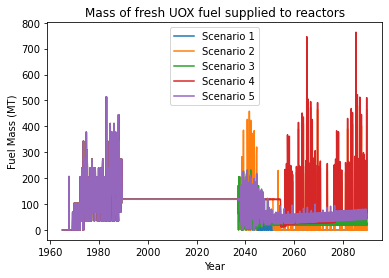

In [12]:
# Comparing fresh_uox transactions to all reactors
plt.figure()
plt.plot(current_commodities['Year'], current_commodities['fresh_uox']/1000, 
         label='Scenario 1')
plt.plot(mmr_nogrowth_commodities['Year'], mmr_nogrowth_commodities['fresh_uox']/1000, 
          label='Scenario 2')
plt.plot(xe_nogrowth_commodities['Year'], xe_nogrowth_commodities['fresh_uox']/1000, 
          label='Scenario 3')
plt.plot(mmr_1percent_commodities['Year'], mmr_1percent_commodities['fresh_uox']/1000, 
         label='Scenario 4')
plt.plot(xe_1percent_commodities['Year'], xe_1percent_commodities['fresh_uox']/1000, 
          label='Scenario 5')
plt.legend()
plt.ylabel('Fuel Mass (MT)')
plt.xlabel('Year')
plt.title('Mass of fresh UOX fuel supplied to reactors')
#plt.savefig('figures/fuelsupply_scenarios_all.png')

In [13]:
# Fuel transactions just for HALEU reactors
mmr_nogrowth_freshuox = tm.transactions_to_prototype(mmr_nogrowth_transactions, 'MMR')
xe_nogrowth_freshuox = tm.transactions_to_prototype(xe_nogrowth_transactions, 'Xe-100')
mmr_1percent_freshuox = tm.transactions_to_prototype(mmr_1percent_transactions, 'MMR')
xe_1percent_freshuox = tm.transactions_to_prototype(xe_1percent_transactions, 'Xe-100')
   

/home/amandabachmann/transition-scenarios/input/haleu/analysis/transition_metrics.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][index] = np.round(df['Time'][index] / 12 + 1965, 2)


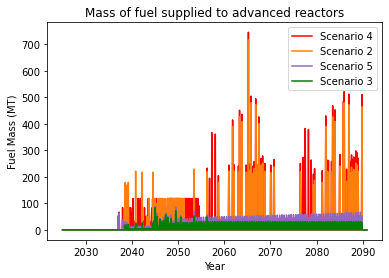

In [38]:
plt.plot(mmr_1percent_freshuox['Year'][720:1512], 
         mmr_1percent_freshuox['Quantity'][720:1512]/1000, 'r',
         label='Scenario 4')
plt.plot(mmr_nogrowth_freshuox['Year'][720:1512], 
         mmr_nogrowth_freshuox['Quantity'][720:1512]/1000, 'tab:orange',
          label='Scenario 2')
plt.plot(xe_1percent_freshuox['Year'][720:1512], 
         xe_1percent_freshuox['Quantity'][720:1512]/1000, 'tab:purple',
          label='Scenario 5')
plt.plot(xe_nogrowth_freshuox['Year'][720:1512], 
         xe_nogrowth_freshuox['Quantity'][720:1512]/1000, 'g',
          label='Scenario 3')

plt.legend()
plt.ylabel('Fuel Mass (MT)')
plt.xlabel('Year')
plt.title('Mass of fuel supplied to advanced reactors')
plt.savefig('figures/advancedRX_fuelsupply_scenarios_2-5.png')    

## SWU Calculations
SWU = (P*V(x_p) + T*V(x_t) - F*V(x_f))*t

V(x_i) = (2*x_i-1)*ln(x_i/(1-x_i))

In [39]:
#Defining assays for LEU product, tails, and feed material
leu_p = 0.045
mmr_p = 0.13
xe_p = 0.155
x_f = 0.00711
x_t = 0.002

### SWU for HALEU to advanced reactors

In [78]:
# Scenario 2
mmr_tails = tm.calculate_tails(mmr_nogrowth_freshuox['Quantity'], mmr_p, x_t, x_f)
mmr_feed = tm.calculate_feed(mmr_nogrowth_freshuox['Quantity'], mmr_tails)
mmr_nogrowth_swu = tm.calculate_SWU(mmr_nogrowth_freshuox['Quantity'], mmr_p, 
                               mmr_tails, x_t, 
                               mmr_feed, x_f)
mmr_nogrowth_swu = mmr_nogrowth_swu.to_frame().reset_index()
mmr_nogrowth_swu = mmr_nogrowth_swu.rename(columns={'Quantity':'SWU', 'index':'Time'})
mmr_nogrowth_swu = tm.add_year(mmr_nogrowth_swu)

/home/amandabachmann/transition-scenarios/input/haleu/analysis/transition_metrics.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][index] = np.round(df['Time'][index] / 12 + 1965, 2)


In [84]:
# Scenario 3
xe_tails = tm.calculate_tails(xe_nogrowth_freshuox['Quantity'], xe_p, x_t, x_f)
xe_feed = tm.calculate_feed(xe_nogrowth_freshuox['Quantity'], xe_tails)
xe_nogrowth_swu = tm.calculate_SWU(xe_nogrowth_freshuox['Quantity'], xe_p, 
                               xe_tails, x_t, 
                               xe_feed, x_f)
xe_nogrowth_swu = xe_nogrowth_swu.to_frame().reset_index()
xe_nogrowth_swu = xe_nogrowth_swu.rename(columns={'Quantity':'SWU', 'index':'Time'})
xe_nogrowth_swu = tm.add_year(xe_nogrowth_swu)

/home/amandabachmann/transition-scenarios/input/haleu/analysis/transition_metrics.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][index] = np.round(df['Time'][index] / 12 + 1965, 2)


In [85]:
# Scenario 4
mmr_tails = tm.calculate_tails(mmr_1percent_freshuox['Quantity'], mmr_p, x_t, x_f)
mmr_feed = tm.calculate_feed(mmr_1percent_freshuox['Quantity'], mmr_tails)
mmr_1percent_swu = tm.calculate_SWU(mmr_1percent_freshuox['Quantity'], mmr_p, 
                               mmr_tails, x_t, 
                               mmr_feed, x_f)
mmr_1percent_swu = mmr_1percent_swu.to_frame().reset_index()
mmr_1percent_swu = mmr_1percent_swu.rename(columns={'Quantity':'SWU', 'index':'Time'})
mmr_1percent_swu = tm.add_year(mmr_1percent_swu)

/home/amandabachmann/transition-scenarios/input/haleu/analysis/transition_metrics.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][index] = np.round(df['Time'][index] / 12 + 1965, 2)


In [86]:
# Scenario 5
xe_tails = tm.calculate_tails(xe_1percent_freshuox['Quantity'], xe_p, x_t, x_f)
xe_feed = tm.calculate_feed(xe_1percent_freshuox['Quantity'], xe_tails)
xe_1percent_swu = tm.calculate_SWU(xe_1percent_freshuox['Quantity'], xe_p, 
                               xe_tails, x_t, 
                               xe_feed, x_f)
xe_1percent_swu = xe_1percent_swu.to_frame().reset_index()
xe_1percent_swu = xe_1percent_swu.rename(columns={'Quantity':'SWU', 'index':'Time'})
xe_1percent_swu = tm.add_year(xe_1percent_swu)

/home/amandabachmann/transition-scenarios/input/haleu/analysis/transition_metrics.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][index] = np.round(df['Time'][index] / 12 + 1965, 2)


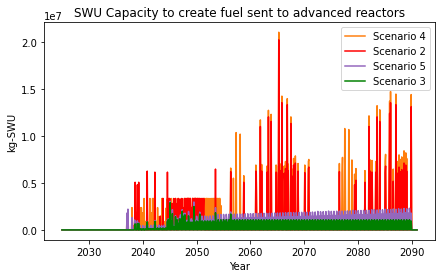

In [88]:
plt.figure(figsize=(7,4))
plt.plot(mmr_1percent_swu['Year'][720:1512], mmr_1percent_swu['SWU'][720:1512],
        'tab:orange', label='Scenario 4')
plt.plot(mmr_nogrowth_swu['Year'][720:1512], mmr_nogrowth_swu['SWU'][720:1512],
        'r', label='Scenario 2')
plt.plot(xe_1percent_swu['Year'][720:1512], xe_1percent_swu['SWU'][720:1512],
        'tab:purple', label='Scenario 5')
plt.plot(xe_nogrowth_swu['Year'][720:1512], xe_nogrowth_swu['SWU'][720:1512],
        'g', label='Scenario 3')
plt.xlabel('Year')
plt.ylabel('kg-SWU')
plt.title('SWU Capacity to create fuel sent to advanced reactors')
plt.legend()
plt.savefig('figures/haleuSWU_scenarios_all.png')

### Total SWU

In [ ]:
# Scenario 1
current_tails = tm.calculate_tails(current_commodities['fresh_uox'], leu_p, x_t, x_f)
current_feed = tm.calculate_feed(current_commodities['fresh_uox'], current_tails)
current_swu = tm.calculate_SWU(current_commodities['fresh_uox'], leu_p, 
                               current_tails, x_t, 
                               current_feed, x_f)
current_swu = current_swu.to_frame().reset_index()
current_swu = current_swu.rename(columns={'fresh_uox':'SWU', 'index':'Time'})
current_swu = tm.add_year(current_swu)